In [15]:
import pickle
import torchvision
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense


In [16]:
import numpy as np


from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

print("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)

Tensorflow version: 2.11.0
Keras version: 2.11.0


In [9]:
#Call cifar10 data set
tf.keras.datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [10]:
#Load cifar10 data set
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [11]:
#Verify the shape of the data set
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [12]:
# Normalizing
x_train = x_train/255
x_test = x_test/255
# One-Hot-Encoding
y_train = keras.utils.to_categorical(y_train, 10)  
y_test = keras.utils.to_categorical(y_test, 10)

#### A CNN model with one layer each of convolutional, pooling, and fully connected layers.

In [53]:
model = keras.Sequential()

# Add convolution layer and pooling layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))


# Add the full connection layer
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))


Epoch 1/10
782/782 [==============================] - 15s 19ms/step - loss: 1.5174 - accuracy: 0.4676 - val_loss: 1.3384 - val_accuracy: 0.5345
Epoch 2/10
782/782 [==============================] - 14s 18ms/step - loss: 1.2389 - accuracy: 0.5721 - val_loss: 1.2506 - val_accuracy: 0.5536
Epoch 3/10
782/782 [==============================] - 14s 18ms/step - loss: 1.1396 - accuracy: 0.6064 - val_loss: 1.1717 - val_accuracy: 0.5935
Epoch 4/10
782/782 [==============================] - 14s 18ms/step - loss: 1.0687 - accuracy: 0.6334 - val_loss: 1.1641 - val_accuracy: 0.5955
Epoch 5/10
782/782 [==============================] - 15s 19ms/step - loss: 1.0193 - accuracy: 0.6500 - val_loss: 1.1297 - val_accuracy: 0.6003
Epoch 6/10
782/782 [==============================] - 15s 19ms/step - loss: 0.9789 - accuracy: 0.6651 - val_loss: 1.0746 - val_accuracy: 0.6275
Epoch 7/10
782/782 [==============================] - 15s 19ms/step - loss: 0.9478 - accuracy: 0.6752 - val_loss: 1.1109 - val_accuracy:

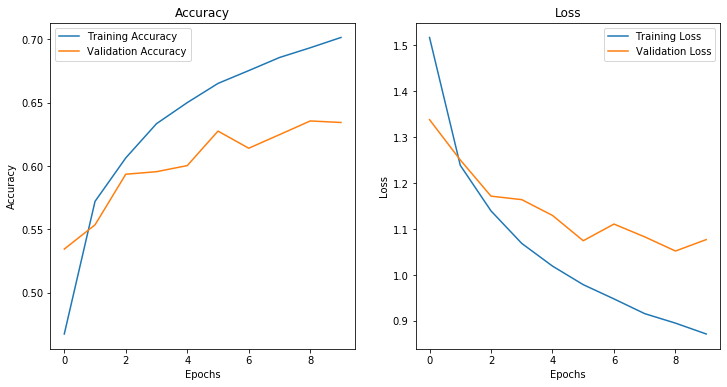

313/313 [==============================] - 1s 3ms/step - loss: 1.0770 - accuracy: 0.6343
Test accuracy: 0.6342999935150146


In [54]:
# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Get accuracy and loss values during training
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Draw accuracy image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot a loss value image
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# Evaluate the model and print the test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


#### A CNN model with two layers each of convolutional, pooling, and fully connected layers.

In [55]:
model1 = keras.Sequential()

# Add convolution layer and pooling layer
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

# Add the full connection layer
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

Epoch 1/10
782/782 [==============================] - 26s 33ms/step - loss: 1.5581 - accuracy: 0.4400 - val_loss: 1.2944 - val_accuracy: 0.5462
Epoch 2/10
782/782 [==============================] - 25s 32ms/step - loss: 1.2188 - accuracy: 0.5704 - val_loss: 1.1565 - val_accuracy: 0.5927
Epoch 3/10
782/782 [==============================] - 25s 32ms/step - loss: 1.0818 - accuracy: 0.6227 - val_loss: 1.0553 - val_accuracy: 0.6377
Epoch 4/10
782/782 [==============================] - 24s 31ms/step - loss: 0.9906 - accuracy: 0.6563 - val_loss: 1.0085 - val_accuracy: 0.6535
Epoch 5/10
782/782 [==============================] - 25s 31ms/step - loss: 0.9164 - accuracy: 0.6829 - val_loss: 0.9822 - val_accuracy: 0.6626
Epoch 6/10
782/782 [==============================] - 25s 32ms/step - loss: 0.8622 - accuracy: 0.6994 - val_loss: 0.9452 - val_accuracy: 0.6760
Epoch 7/10
782/782 [==============================] - 25s 32ms/step - loss: 0.8131 - accuracy: 0.7179 - val_loss: 0.9370 - val_accuracy:

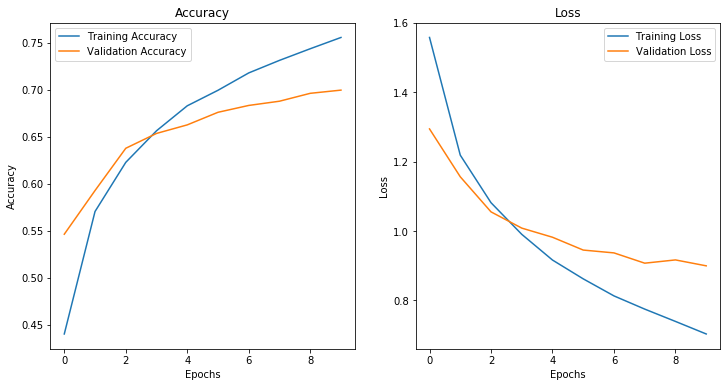

313/313 [==============================] - 1s 4ms/step - loss: 0.8998 - accuracy: 0.6996
Test accuracy: 0.6995999813079834


In [56]:
# Compile and train the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Get accuracy and loss values during training
train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']

# Draw accuracy image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot a loss value image
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# Evaluate the model and print the test accuracy
test_loss, test_acc = model1.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

#### CNN model with added dropout layers

In [57]:
model2 = keras.Sequential()  

# Add convolution layer and pooling layer
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

# Add Dropout layer
model2.add(layers.Dropout(0.25))  

# Add the full connection layer
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))


Epoch 1/20
782/782 [==============================] - 29s 36ms/step - loss: 1.5561 - accuracy: 0.4396 - val_loss: 1.2663 - val_accuracy: 0.5519
Epoch 2/20
782/782 [==============================] - 25s 33ms/step - loss: 1.2270 - accuracy: 0.5677 - val_loss: 1.1275 - val_accuracy: 0.6063
Epoch 3/20
782/782 [==============================] - 26s 33ms/step - loss: 1.0954 - accuracy: 0.6172 - val_loss: 1.0359 - val_accuracy: 0.6429
Epoch 4/20
782/782 [==============================] - 27s 35ms/step - loss: 1.0065 - accuracy: 0.6473 - val_loss: 0.9757 - val_accuracy: 0.6604
Epoch 5/20
782/782 [==============================] - 27s 34ms/step - loss: 0.9404 - accuracy: 0.6725 - val_loss: 0.9353 - val_accuracy: 0.6789
Epoch 6/20
782/782 [==============================] - 27s 35ms/step - loss: 0.8956 - accuracy: 0.6886 - val_loss: 0.9719 - val_accuracy: 0.6590
Epoch 7/20
782/782 [==============================] - 26s 33ms/step - loss: 0.8573 - accuracy: 0.7033 - val_loss: 0.9287 - val_accuracy:

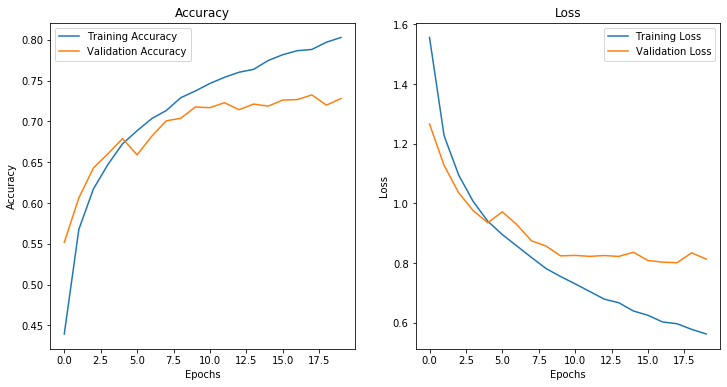

313/313 [==============================] - 1s 4ms/step - loss: 0.8133 - accuracy: 0.7280
Test accuracy: 0.7279999852180481


In [58]:
# Compile and train the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Get accuracy and loss values during training
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Draw accuracy image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot a loss value image
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# Evaluate the model and print the test accuracy
test_loss, test_acc = model2.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

#### The CNN model with reduced convolutional kernel quantity and increased kernel size.

In [61]:
model3 = keras.Sequential() 

# Add convolution layer and pooling layer
model3.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (4, 4), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

# Add Dropout layer
model3.add(layers.Dropout(0.25))  

# Add the full connection layer
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

Epoch 1/20
782/782 [==============================] - 27s 34ms/step - loss: 1.6867 - accuracy: 0.3829 - val_loss: 1.4312 - val_accuracy: 0.4875
Epoch 2/20
782/782 [==============================] - 26s 33ms/step - loss: 1.3830 - accuracy: 0.5006 - val_loss: 1.2683 - val_accuracy: 0.5483
Epoch 3/20
782/782 [==============================] - 26s 33ms/step - loss: 1.2663 - accuracy: 0.5509 - val_loss: 1.1724 - val_accuracy: 0.5889
Epoch 4/20
782/782 [==============================] - 26s 33ms/step - loss: 1.1798 - accuracy: 0.5815 - val_loss: 1.0809 - val_accuracy: 0.6164
Epoch 5/20
782/782 [==============================] - 26s 33ms/step - loss: 1.1174 - accuracy: 0.6049 - val_loss: 1.0959 - val_accuracy: 0.6129
Epoch 6/20
782/782 [==============================] - 26s 33ms/step - loss: 1.0697 - accuracy: 0.6234 - val_loss: 1.0314 - val_accuracy: 0.6360
Epoch 7/20
782/782 [==============================] - 28s 35ms/step - loss: 1.0285 - accuracy: 0.6393 - val_loss: 1.0186 - val_accuracy:

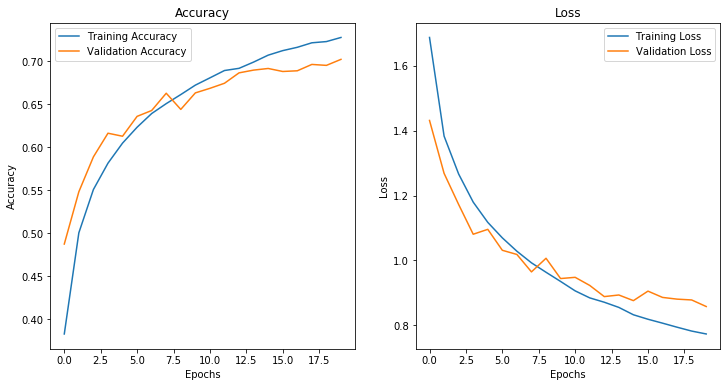

313/313 [==============================] - 1s 4ms/step - loss: 0.8583 - accuracy: 0.7023
Test accuracy: 0.7023000121116638


In [62]:
# Compile and train the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Get accuracy and loss values during training
train_acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
train_loss = history3.history['loss']
val_loss = history3.history['val_loss']

# Draw accuracy image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot a loss value image
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# Evaluate the model and print the test accuracy
test_loss, test_acc = model3.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

#### The CNN model with increased convolutional kernel quantity and reduced kernel size.

In [63]:
model4 = keras.Sequential() 

# Add convolution layer and pooling layer
model4.add(layers.Conv2D(64, (2, 2), activation='relu', input_shape=(32, 32, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (2, 2), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

# Add Dropout layer
model4.add(layers.Dropout(0.25))  

# Add the full connection layer
model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))

Epoch 1/20
782/782 [==============================] - 41s 52ms/step - loss: 1.4676 - accuracy: 0.4780 - val_loss: 1.2196 - val_accuracy: 0.5707
Epoch 2/20
782/782 [==============================] - 40s 51ms/step - loss: 1.1412 - accuracy: 0.6005 - val_loss: 1.0650 - val_accuracy: 0.6225
Epoch 3/20
782/782 [==============================] - 38s 49ms/step - loss: 1.0179 - accuracy: 0.6439 - val_loss: 0.9750 - val_accuracy: 0.6595
Epoch 4/20
782/782 [==============================] - 38s 48ms/step - loss: 0.9364 - accuracy: 0.6737 - val_loss: 0.9592 - val_accuracy: 0.6692
Epoch 5/20
782/782 [==============================] - 37s 47ms/step - loss: 0.8806 - accuracy: 0.6909 - val_loss: 0.8844 - val_accuracy: 0.6894
Epoch 6/20
782/782 [==============================] - 38s 49ms/step - loss: 0.8336 - accuracy: 0.7095 - val_loss: 0.8537 - val_accuracy: 0.7017
Epoch 7/20
782/782 [==============================] - 37s 47ms/step - loss: 0.7974 - accuracy: 0.7224 - val_loss: 0.8467 - val_accuracy:

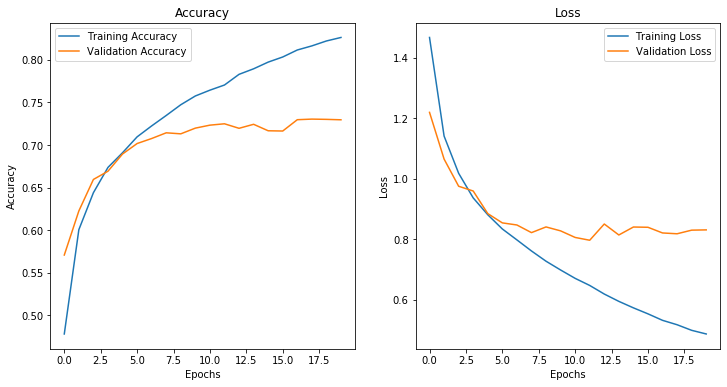

313/313 [==============================] - 2s 7ms/step - loss: 0.8305 - accuracy: 0.7296
Test accuracy: 0.7296000123023987


In [64]:
# Compile and train the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history4 = model4.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Get accuracy and loss values during training
train_acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
train_loss = history4.history['loss']
val_loss = history4.history['val_loss']

# Draw accuracy image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot a loss value image
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# Evaluate the model and print the test accuracy
test_loss, test_acc = model4.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

#### LeNet-5 architecture

In [17]:
model5 = keras.Sequential()

# Add convolution layer and pooling layer
model5.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model5.add(AveragePooling2D(pool_size=(2, 2)))

model5.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model5.add(AveragePooling2D(pool_size=(2, 2)))

# Add Dropout layer
model5.add(layers.Dropout(0.25))  

# Add the full connection layer
model5.add(Flatten())
model5.add(Dense(units=120, activation='relu'))
model5.add(Dense(units=84, activation='relu'))
model5.add(Dense(units=10, activation='softmax'))




Epoch 1/20
782/782 [==============================] - 29s 35ms/step - loss: 1.5478 - accuracy: 0.4379 - val_loss: 1.2912 - val_accuracy: 0.5395
Epoch 2/20
782/782 [==============================] - 28s 36ms/step - loss: 1.2332 - accuracy: 0.5596 - val_loss: 1.1242 - val_accuracy: 0.5999
Epoch 3/20
782/782 [==============================] - 28s 35ms/step - loss: 1.0923 - accuracy: 0.6126 - val_loss: 1.0100 - val_accuracy: 0.6462
Epoch 4/20
782/782 [==============================] - 28s 36ms/step - loss: 0.9861 - accuracy: 0.6532 - val_loss: 0.9594 - val_accuracy: 0.6617
Epoch 5/20
782/782 [==============================] - 27s 34ms/step - loss: 0.9155 - accuracy: 0.6791 - val_loss: 0.9184 - val_accuracy: 0.6779
Epoch 6/20
782/782 [==============================] - 26s 33ms/step - loss: 0.8489 - accuracy: 0.6996 - val_loss: 0.8658 - val_accuracy: 0.6985
Epoch 7/20
782/782 [==============================] - 25s 33ms/step - loss: 0.7928 - accuracy: 0.7209 - val_loss: 0.8782 - val_accuracy:

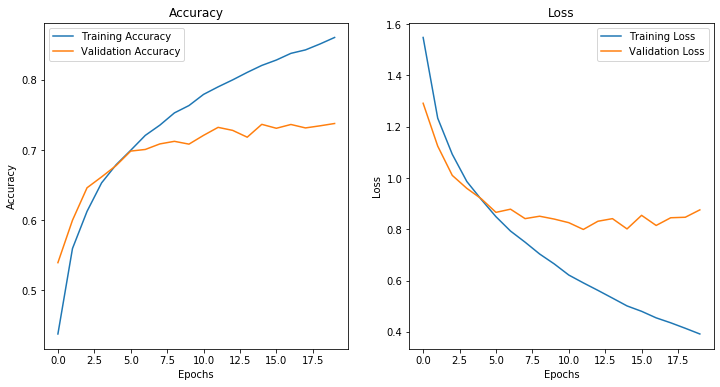

313/313 [==============================] - 1s 5ms/step - loss: 0.8755 - accuracy: 0.7378
Test accuracy: 0.7378000020980835


In [18]:
# Compile and train the model
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history5 = model5.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Get accuracy and loss values during training
train_acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
train_loss = history5.history['loss']
val_loss = history5.history['val_loss']

# Draw accuracy image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot a loss value image
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# Evaluate the model and print the test accuracy
test_loss, test_acc = model5.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

#### AlexNet architecture

In [19]:
model6 = keras.Sequential()

# Add convolution layer and pooling layer
model6.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model6.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model6.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

# Add Dropout layer
model6.add(Dropout(0.25))

# Add the full connection layer
model6.add(Flatten())
model6.add(Dense(units=120, activation='relu'))
model6.add(Dense(units=84, activation='relu'))
model6.add(Dense(units=10, activation='softmax'))




Epoch 1/20
782/782 [==============================] - 122s 155ms/step - loss: 1.5531 - accuracy: 0.4228 - val_loss: 1.2336 - val_accuracy: 0.5435
Epoch 2/20
782/782 [==============================] - 116s 148ms/step - loss: 1.0868 - accuracy: 0.6120 - val_loss: 0.9757 - val_accuracy: 0.6622
Epoch 3/20
782/782 [==============================] - 117s 150ms/step - loss: 0.8723 - accuracy: 0.6923 - val_loss: 0.8983 - val_accuracy: 0.6842
Epoch 4/20
782/782 [==============================] - 128s 164ms/step - loss: 0.7401 - accuracy: 0.7399 - val_loss: 0.7721 - val_accuracy: 0.7259
Epoch 5/20
782/782 [==============================] - 126s 162ms/step - loss: 0.6313 - accuracy: 0.7805 - val_loss: 0.7011 - val_accuracy: 0.7567
Epoch 6/20
782/782 [==============================] - 117s 150ms/step - loss: 0.5422 - accuracy: 0.8101 - val_loss: 0.7310 - val_accuracy: 0.7462
Epoch 7/20
782/782 [==============================] - 114s 145ms/step - loss: 0.4666 - accuracy: 0.8364 - val_loss: 0.7371 -

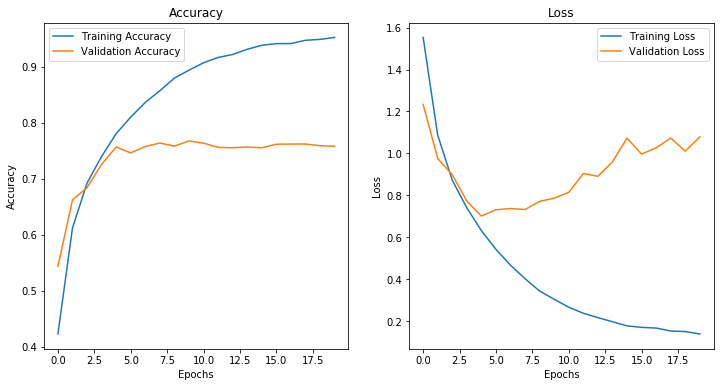

313/313 [==============================] - 5s 16ms/step - loss: 1.0787 - accuracy: 0.7579
Test accuracy: 0.7578999996185303


In [20]:
# Compile and train the model
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history6 = model6.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Get accuracy and loss values during training
train_acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
train_loss = history6.history['loss']
val_loss = history6.history['val_loss']

# Draw accuracy image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot a loss value image
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# Evaluate the model and print the test accuracy
test_loss, test_acc = model6.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

#### AlexNet architecture added L2 regularization

In [23]:
from keras.regularizers import l2

model7 = keras.Sequential()

# Add convolution layer and pooling layer
model7.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same', kernel_regularizer=l2(0.001)))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model7.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model7.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model7.add(MaxPooling2D(pool_size=(2, 2)))

# Add Dropout layer
model7.add(Dropout(0.25))

# Add the full connection layer
model7.add(Flatten())
model7.add(Dense(units=120, activation='relu', kernel_regularizer=l2(0.001)))
model7.add(Dense(units=84, activation='relu', kernel_regularizer=l2(0.001)))
model7.add(Dense(units=10, activation='softmax'))


Epoch 1/20
782/782 [==============================] - 120s 152ms/step - loss: 1.8627 - accuracy: 0.3477 - val_loss: 1.5646 - val_accuracy: 0.4569
Epoch 2/20
782/782 [==============================] - 119s 152ms/step - loss: 1.4817 - accuracy: 0.4950 - val_loss: 1.3921 - val_accuracy: 0.5422
Epoch 3/20
782/782 [==============================] - 120s 153ms/step - loss: 1.3394 - accuracy: 0.5641 - val_loss: 1.3147 - val_accuracy: 0.5808
Epoch 4/20
782/782 [==============================] - 120s 154ms/step - loss: 1.2477 - accuracy: 0.6089 - val_loss: 1.2194 - val_accuracy: 0.6262
Epoch 5/20
782/782 [==============================] - 119s 152ms/step - loss: 1.1791 - accuracy: 0.6411 - val_loss: 1.1414 - val_accuracy: 0.6618
Epoch 6/20
782/782 [==============================] - 119s 153ms/step - loss: 1.1288 - accuracy: 0.6641 - val_loss: 1.1453 - val_accuracy: 0.6610
Epoch 7/20
782/782 [==============================] - 119s 152ms/step - loss: 1.0909 - accuracy: 0.6822 - val_loss: 1.0624 -

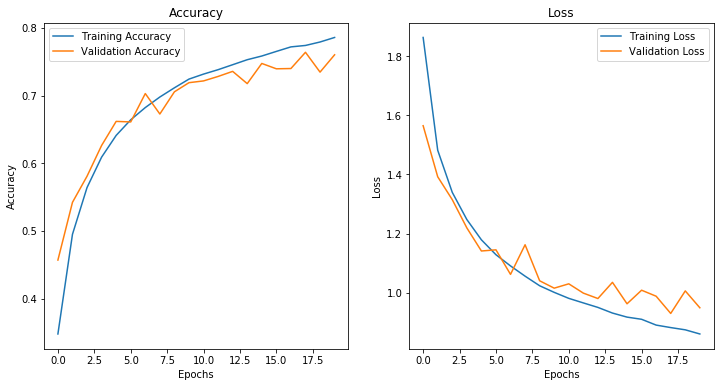

313/313 [==============================] - 6s 18ms/step - loss: 0.9495 - accuracy: 0.7602
Test accuracy: 0.760200023651123


In [24]:
# Compile and train the model
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history7 = model7.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Get accuracy and loss values during training
train_acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']
train_loss = history7.history['loss']
val_loss = history7.history['val_loss']

# Draw accuracy image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot a loss value image
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# Evaluate the model and print the test accuracy
test_loss, test_acc = model7.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')